# Test Backends

## Build a backend from csv files

In [2]:
# Generate props_huayi.json from .csv experimental data
from backend_build import build_from_file

c = build_from_file(backend_name='Huayi30',
       backend_version='0.0.1',
       qubits_data='data/qubits_data_30.csv', 
       gates_data='data/gates_data_30.csv',)


Successfully created props_Huayi30.json
Successfully created conf_Huayi30.json
New backends created, please import the backends with:
from huayi_providers.fake_Huayi30 import FakeHuayi30, FakeHuayi30V2


## Check if the new backend works

Transpile a circuit with the customized backend:\
``transpiled_circuit = transpile(ciruit, backend, optimization_level)``

In [11]:
from qiskit.circuit.library import EfficientSU2
from qiskit import transpile
from qiskit import QuantumCircuit

from fake_Huayi37 import FakeHuayi37

backend = FakeHuayi37()

n_qubits = 4
ansatz = EfficientSU2(n_qubits, 
                      su2_gates=['ry'], 
                      entanglement="linear", 
                      reps=1,
                      flatten=True)
print("Efficient SU2 ansatz")
print(ansatz.draw(fold=140, idle_wires=False))

c = transpile(ansatz, backend=backend, optimization_level=3)
print("Transpileed with Huayi backend, depth = {}".format(c.depth()))
print(c.draw(fold=140, idle_wires=False))


Efficient SU2 ansatz
     ┌──────────┐     ┌──────────┐                        
q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[4]) ├────────────────────────
     ├──────────┤┌─┴─┐└──────────┘┌──────────┐            
q_1: ┤ Ry(θ[1]) ├┤ X ├─────■──────┤ Ry(θ[5]) ├────────────
     ├──────────┤└───┘   ┌─┴─┐    └──────────┘┌──────────┐
q_2: ┤ Ry(θ[2]) ├────────┤ X ├─────────■──────┤ Ry(θ[6]) ├
     ├──────────┤        └───┘       ┌─┴─┐    ├──────────┤
q_3: ┤ Ry(θ[3]) ├────────────────────┤ X ├────┤ Ry(θ[7]) ├
     └──────────┘                    └───┘    └──────────┘
Transpileed with Huayi backend, depth = 13
global phase: π
          ┌──────────┐┌─────────┐┌───────┐                                                   ┌─────────┐ ┌───────┐┌──────────┐
q_3 -> 24 ┤ Ry(θ[3]) ├┤ Ry(π/2) ├┤ Rx(π) ├─────────────────────────────────────────────────■─┤ Ry(π/2) ├─┤ Rx(π) ├┤ Ry(θ[7]) ├
          ├──────────┤├─────────┤├───────┤                           ┌─────────┐ ┌───────┐ │ ├─────────┴┐└───────┘└──────────┘
q_2 -> 2

Show gate errors in backends

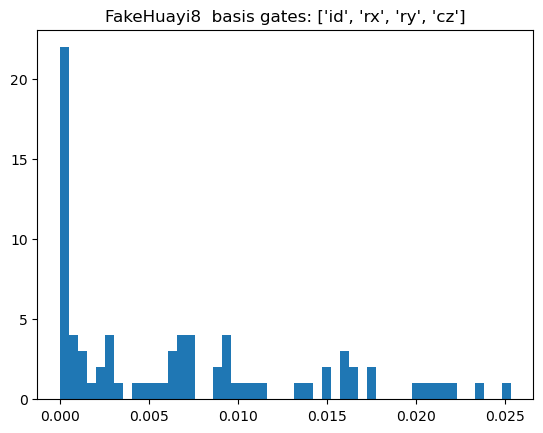

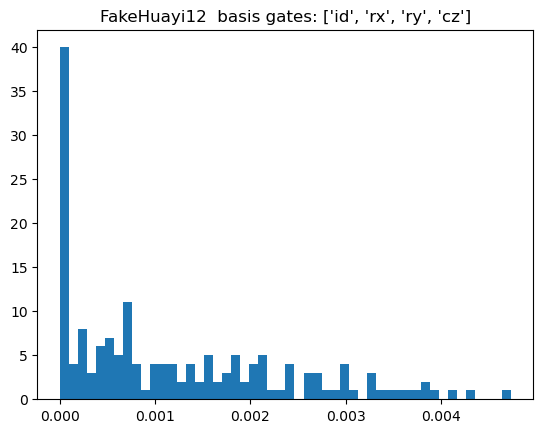

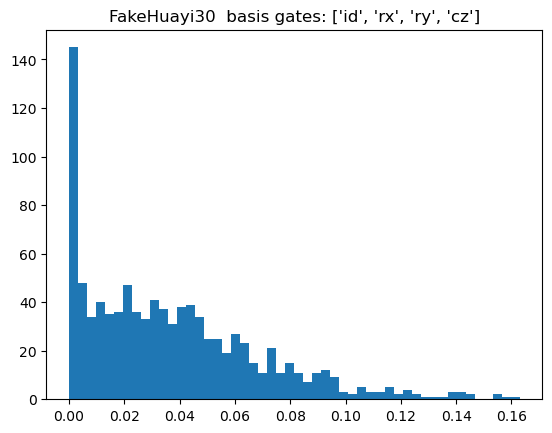

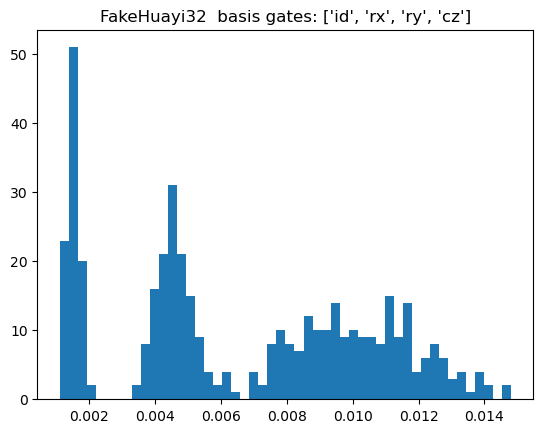

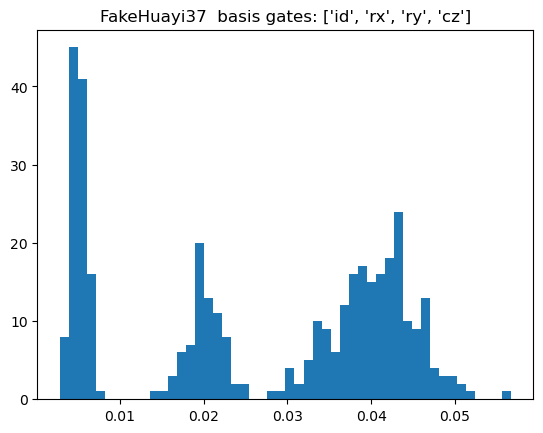

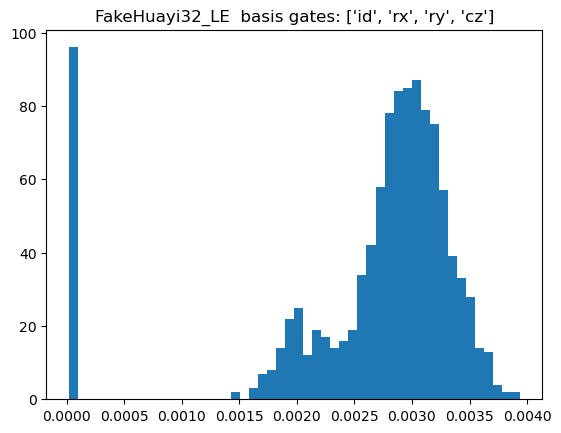

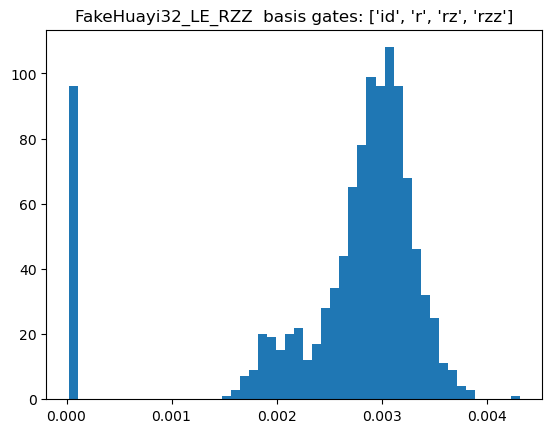

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

for n in [8,12,30,32,37]:
    data = pd.read_csv(f"./data/gates_data_{n}.csv")
    basis_gates = list(data["gate"].drop_duplicates())
    plt.hist(data["gate_error"], bins=50)
    plt.title(f"FakeHuayi{n}  basis gates: {basis_gates}")
    plt.show()


data = pd.read_csv(f"./data/gates_data_32_lower.csv")
basis_gates = list(data["gate"].drop_duplicates())
plt.hist(data["gate_error"], bins=50)
plt.title(f"FakeHuayi32_LE  basis gates: {basis_gates}")
plt.show()


data = pd.read_csv(f"./data/gates_data_32_lower_rzz.csv")
basis_gates = list(data["gate"].drop_duplicates())
plt.hist(data["gate_error"], bins=50)
plt.title(f"FakeHuayi32_LE_RZZ  basis gates: {basis_gates}")
plt.show()